In [1]:
import os
import sys

sys.path.insert(0, os.path.abspath("../src/"))

In [2]:
import numpy as np
import pandas as pd

from pprint import pprint

import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap


In [3]:
from med_embed.compare.df_styles import style_dataframe, create_custom_colormap
from med_embed.compare.head2head import compare_models, plot_comparison

### Helpers

In [4]:
METRICS = [
    'task_name',
    'model',
    'ndcg_at_1',
    'ndcg_at_5',
    'ndcg_at_10',
    'map_at_5',
    'map_at_10',
    'recall_at_1',
    'recall_at_5',
    'recall_at_10',
    'precision_at_1',
    'precision_at_5',
    'mrr_at_1',
    'mrr_at_5',
    # 'nauc_ndcg_at_10_max',
    # 'nauc_ndcg_at_10_std',
    # 'languages'
]

## BGE Small

In [5]:
df = pd.concat([
    pd.read_csv('../results/med_emb_small_v1_results.csv'),
    pd.read_csv('../results/med_emb_small_v2_results.csv'),
], ignore_index=True)
df["model"].value_counts()

model
abhinand/medical-bge-small-v1.5-1    5
./medical-bge-small-v1-mix0          5
./medical-bge-small-v1-mix1          5
./medical-bge-small-v1-mix2          5
./medical-bge-small-v1-mix3          5
BAAI/bge-small-en-v1.5               5
./medical-bge-small-v2               5
./medical-bge-small-v2-mix0          5
./medical-bge-small-v2-mix1          5
./medical-bge-small-v2-mix2          5
./medical-bge-small-v2-mix3          5
Name: count, dtype: int64

In [6]:
df["task_name"].value_counts()

task_name
PublicHealthQA        11
MedicalQARetrieval    11
TRECCOVID             11
NFCorpus              11
ArguAna               11
Name: count, dtype: int64

In [7]:
# pprint(list(df.columns))

In [8]:
selected_metrics = METRICS.copy()

df["avg"] = df[selected_metrics].iloc[:, 2:].mean(axis=1)

selected_metrics.append("avg")

In [9]:
_m1_df = df.loc[df["task_name"] == "ArguAna", selected_metrics]
display(style_dataframe(_m1_df, colormap=create_custom_colormap()))

,task_name,model,ndcg_at_1,ndcg_at_5,ndcg_at_10,map_at_5,map_at_10,recall_at_1,recall_at_5,recall_at_10,precision_at_1,precision_at_5,mrr_at_1,mrr_at_5,avg
4,ArguAna,abhinand/medical-bge-small-v1.5-1,0.364860,0.558990,0.601130,0.500330,0.518150,0.364860,0.736130,0.864150,0.364860,0.147230,0.371977,0.503046,0.491309
9,ArguAna,./medical-bge-small-v1-mix0,0.376960,0.573650,0.615250,0.515620,0.532900,0.376960,0.748220,0.876240,0.376960,0.149640,0.381935,0.517591,0.503494
14,ArguAna,./medical-bge-small-v1-mix1,0.379090,0.576050,0.615700,0.517240,0.533780,0.379090,0.753200,0.874820,0.379090,0.150640,0.382646,0.518611,0.504996
19,ArguAna,./medical-bge-small-v1-mix2,0.376960,0.573280,0.613700,0.514130,0.531180,0.376960,0.751780,0.874820,0.376960,0.150360,0.384780,0.517319,0.503519
24,ArguAna,./medical-bge-small-v1-mix3,0.376240,0.570220,0.610520,0.511710,0.528910,0.376240,0.746800,0.868420,0.376240,0.149360,0.382646,0.514083,0.500949
29,ArguAna,BAAI/bge-small-en-v1.5,0.357750,0.551760,0.594990,0.495130,0.513220,0.357750,0.721910,0.854200,0.357750,0.144380,0.362731,0.496230,0.483983
34,ArguAna,./medical-bge-small-v2,0.373400,0.563100,0.605030,0.505990,0.523480,0.373400,0.735420,0.864150,0.373400,0.147080,0.379801,0.508653,0.496075
39,ArguAna,./medical-bge-small-v2-mix0,0.369840,0.569600,0.609440,0.510750,0.527230,0.369840,0.746800,0.869840,0.369840,0.149360,0.374822,0.512707,0.498339
44,ArguAna,./medical-bge-small-v2-mix1,0.374110,0.572200,0.610710,0.513500,0.529450,0.374110,0.748930,0.867710,0.374110,0.149790,0.378378,0.515090,0.500674
49,ArguAna,./medical-bge-small-v2-mix2,0.376240,0.572510,0.611760,0.514180,0.530330,0.376240,0.748220,0.869840,0.376240,0.149640,0.380512,0.515849,0.501797


In [10]:
_m1_df = df.loc[df["task_name"] == "MedicalQARetrieval", selected_metrics]
display(style_dataframe(_m1_df, colormap=create_custom_colormap()))

,task_name,model,ndcg_at_1,ndcg_at_5,ndcg_at_10,map_at_5,map_at_10,recall_at_1,recall_at_5,recall_at_10,precision_at_1,precision_at_5,mrr_at_1,mrr_at_5,avg
1,MedicalQARetrieval,abhinand/medical-bge-small-v1.5-1,0.569340,0.684380,0.706340,0.651750,0.660820,0.569340,0.781740,0.849610,0.569340,0.156350,0.569336,0.651750,0.618341
6,MedicalQARetrieval,./medical-bge-small-v1-mix0,0.546880,0.678280,0.698050,0.641490,0.649580,0.546880,0.788090,0.849610,0.546880,0.157620,0.546875,0.641488,0.607644
11,MedicalQARetrieval,./medical-bge-small-v1-mix1,0.557620,0.683590,0.703160,0.648100,0.656170,0.557620,0.789550,0.850100,0.557620,0.157910,0.557617,0.648104,0.613930
16,MedicalQARetrieval,./medical-bge-small-v1-mix2,0.562010,0.684720,0.705220,0.650070,0.658600,0.562010,0.788090,0.851070,0.562010,0.157620,0.562012,0.650065,0.616125
21,MedicalQARetrieval,./medical-bge-small-v1-mix3,0.563480,0.686160,0.705900,0.651520,0.659660,0.563480,0.789550,0.850590,0.563480,0.157910,0.563477,0.651522,0.617227
26,MedicalQARetrieval,BAAI/bge-small-en-v1.5,0.481450,0.634300,0.655580,0.591960,0.600810,0.481450,0.760250,0.825680,0.481450,0.152050,0.481445,0.591960,0.561532
31,MedicalQARetrieval,./medical-bge-small-v2,0.547850,0.676840,0.695830,0.640390,0.648350,0.547850,0.785640,0.843750,0.547850,0.157130,0.547363,0.640145,0.606582
36,MedicalQARetrieval,./medical-bge-small-v2-mix0,0.527830,0.666580,0.686750,0.628200,0.636580,0.527830,0.780760,0.842770,0.527830,0.156150,0.527832,0.628198,0.594776
41,MedicalQARetrieval,./medical-bge-small-v2-mix1,0.532710,0.669830,0.689680,0.631900,0.640150,0.532710,0.782710,0.843750,0.532710,0.156540,0.532227,0.631657,0.598048
46,MedicalQARetrieval,./medical-bge-small-v2-mix2,0.536130,0.673550,0.690980,0.635000,0.642230,0.536130,0.788570,0.842290,0.536130,0.157710,0.536133,0.635002,0.600821


In [11]:
_m1_df = df.loc[df["task_name"] == "NFCorpus", selected_metrics]
display(style_dataframe(_m1_df, colormap=create_custom_colormap()))

,task_name,model,ndcg_at_1,ndcg_at_5,ndcg_at_10,map_at_5,map_at_10,recall_at_1,recall_at_5,recall_at_10,precision_at_1,precision_at_5,mrr_at_1,mrr_at_5,avg
3,NFCorpus,abhinand/medical-bge-small-v1.5-1,0.430340,0.361420,0.336030,0.106450,0.126200,0.059840,0.123710,0.164410,0.442720,0.308360,0.442724,0.515531,0.284811
8,NFCorpus,./medical-bge-small-v1-mix0,0.433440,0.379750,0.347060,0.112110,0.130610,0.060040,0.130640,0.167970,0.448920,0.330030,0.452012,0.534933,0.293960
13,NFCorpus,./medical-bge-small-v1-mix1,0.431890,0.377080,0.347770,0.111360,0.130180,0.060250,0.129190,0.167450,0.445820,0.326930,0.445820,0.531734,0.292123
18,NFCorpus,./medical-bge-small-v1-mix2,0.417960,0.370860,0.343340,0.109960,0.129100,0.059370,0.127410,0.164990,0.430340,0.321980,0.430341,0.521207,0.285571
23,NFCorpus,./medical-bge-small-v1-mix3,0.417960,0.365220,0.341800,0.108570,0.129010,0.059310,0.124860,0.167680,0.430340,0.315170,0.430341,0.517750,0.284001
28,NFCorpus,BAAI/bge-small-en-v1.5,0.417960,0.372420,0.337080,0.106860,0.123560,0.057490,0.127950,0.158220,0.430340,0.323840,0.430341,0.521930,0.283999
33,NFCorpus,./medical-bge-small-v2,0.402480,0.352280,0.330170,0.105040,0.124530,0.055640,0.125330,0.162590,0.417960,0.305260,0.417957,0.500877,0.275009
38,NFCorpus,./medical-bge-small-v2-mix0,0.427240,0.377400,0.343490,0.111300,0.129560,0.057890,0.130850,0.164010,0.439630,0.329410,0.439628,0.530134,0.290045
43,NFCorpus,./medical-bge-small-v2-mix1,0.421050,0.374190,0.343650,0.111090,0.130250,0.057360,0.130350,0.165490,0.433440,0.326930,0.433437,0.522549,0.287482
48,NFCorpus,./medical-bge-small-v2-mix2,0.414860,0.370100,0.343340,0.109780,0.129860,0.057090,0.127880,0.165510,0.427240,0.322600,0.427245,0.518679,0.284515


In [12]:
_m1_df = df.loc[df["task_name"] == "PublicHealthQA", selected_metrics]
display(style_dataframe(_m1_df, colormap=create_custom_colormap()))

,task_name,model,ndcg_at_1,ndcg_at_5,ndcg_at_10,map_at_5,map_at_10,recall_at_1,recall_at_5,recall_at_10,precision_at_1,precision_at_5,mrr_at_1,mrr_at_5,avg
0,PublicHealthQA,abhinand/medical-bge-small-v1.5-1,0.645350,0.788110,0.808790,0.753290,0.761810,0.645350,0.889530,0.953490,0.645350,0.177910,0.645349,0.753295,0.705635
5,PublicHealthQA,./medical-bge-small-v1-mix0,0.662790,0.797340,0.812290,0.760470,0.766570,0.662790,0.906980,0.953490,0.662790,0.181400,0.662791,0.760465,0.715847
10,PublicHealthQA,./medical-bge-small-v1-mix1,0.674420,0.800700,0.817970,0.766760,0.774090,0.674420,0.901160,0.953490,0.674420,0.180230,0.674419,0.766764,0.721570
15,PublicHealthQA,./medical-bge-small-v1-mix2,0.662790,0.796260,0.813450,0.760760,0.768000,0.662790,0.901160,0.953490,0.662790,0.180230,0.662791,0.760756,0.715439
20,PublicHealthQA,./medical-bge-small-v1-mix3,0.668600,0.800940,0.817860,0.766860,0.773830,0.668600,0.901160,0.953490,0.668600,0.180230,0.668605,0.766860,0.719636
25,PublicHealthQA,BAAI/bge-small-en-v1.5,0.598840,0.750500,0.761770,0.706010,0.710670,0.598840,0.883720,0.918600,0.598840,0.176740,0.598837,0.706008,0.667448
30,PublicHealthQA,./medical-bge-small-v2,0.645350,0.793640,0.809100,0.755040,0.761660,0.645350,0.906980,0.953490,0.645350,0.181400,0.645349,0.755039,0.708146
35,PublicHealthQA,./medical-bge-small-v2-mix0,0.662790,0.791570,0.810610,0.756590,0.764580,0.662790,0.895350,0.953490,0.662790,0.179070,0.662791,0.756589,0.713251
40,PublicHealthQA,./medical-bge-small-v2-mix1,0.668600,0.799890,0.818470,0.763860,0.771400,0.668600,0.906980,0.965120,0.668600,0.181400,0.668605,0.763857,0.720448
45,PublicHealthQA,./medical-bge-small-v2-mix2,0.668600,0.805300,0.816490,0.767250,0.771810,0.668600,0.918600,0.953490,0.668600,0.183720,0.668605,0.767248,0.721526


In [13]:
_m1_df = df.loc[df["task_name"] == "TRECCOVID", selected_metrics]
display(style_dataframe(_m1_df, colormap=create_custom_colormap()))

,task_name,model,ndcg_at_1,ndcg_at_5,ndcg_at_10,map_at_5,map_at_10,recall_at_1,recall_at_5,recall_at_10,precision_at_1,precision_at_5,mrr_at_1,mrr_at_5,avg
2,TRECCOVID,abhinand/medical-bge-small-v1.5-1,0.790000,0.761210,0.750260,0.010240,0.019170,0.002280,0.011100,0.021270,0.860000,0.816000,0.860000,0.911667,0.484433
7,TRECCOVID,./medical-bge-small-v1-mix0,0.840000,0.774100,0.763850,0.010260,0.018980,0.002390,0.010930,0.020990,0.900000,0.816000,0.900000,0.935000,0.499375
12,TRECCOVID,./medical-bge-small-v1-mix1,0.840000,0.782420,0.778130,0.010410,0.019480,0.002390,0.011080,0.021510,0.900000,0.824000,0.900000,0.936667,0.502174
17,TRECCOVID,./medical-bge-small-v1-mix2,0.820000,0.791610,0.775100,0.010650,0.019520,0.002360,0.011340,0.021380,0.880000,0.836000,0.880000,0.926667,0.497886
22,TRECCOVID,./medical-bge-small-v1-mix3,0.820000,0.794960,0.774390,0.010740,0.019520,0.002360,0.011510,0.021380,0.880000,0.848000,0.880000,0.926667,0.499127
27,TRECCOVID,BAAI/bge-small-en-v1.5,0.720000,0.692680,0.664590,0.008790,0.015910,0.002100,0.009620,0.018390,0.820000,0.740000,0.820000,0.872333,0.448701
32,TRECCOVID,./medical-bge-small-v2,0.790000,0.749050,0.725620,0.009980,0.017970,0.002180,0.010790,0.020280,0.840000,0.796000,0.840000,0.910667,0.476045
37,TRECCOVID,./medical-bge-small-v2-mix0,0.790000,0.749320,0.735580,0.009890,0.018350,0.002270,0.010640,0.020640,0.860000,0.792000,0.860000,0.906667,0.479613
42,TRECCOVID,./medical-bge-small-v2-mix1,0.800000,0.745180,0.742960,0.009760,0.018450,0.002270,0.010510,0.020760,0.860000,0.780000,0.860000,0.906667,0.479713
47,TRECCOVID,./medical-bge-small-v2-mix2,0.780000,0.743630,0.742750,0.009660,0.018370,0.002200,0.010470,0.020780,0.840000,0.780000,0.840000,0.900000,0.473988


### Head to Head

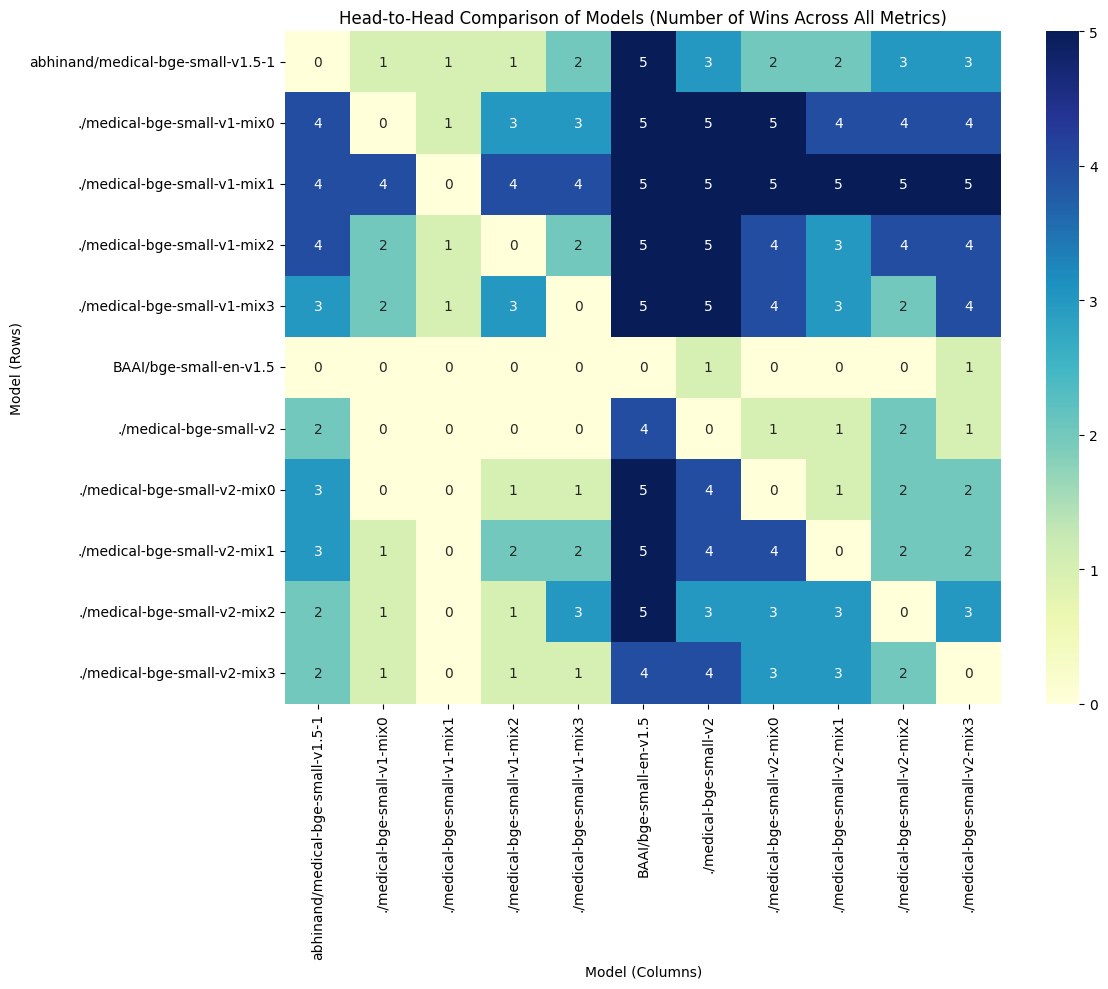

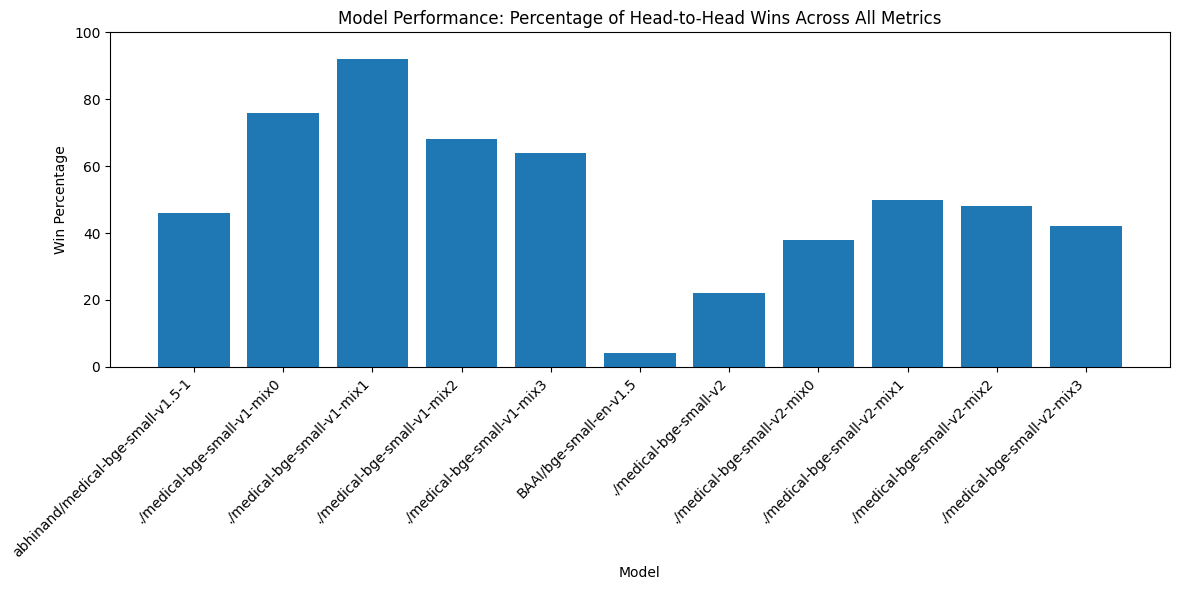

In [14]:
# Compare all models
win_matrix, win_percentages = compare_models(df, metrics=["avg"])
plot_comparison(win_matrix, win_percentages, df['model'].unique())

In [15]:
# Print ranking
ranking = pd.Series(win_percentages, index=df['model'].unique()).sort_values(ascending=False)
print("Model Ranking based on Head-to-Head Wins:")
# for model, percentage in ranking.items():
#     print(f"{model}: {percentage:.2f}%")
ranking = ranking.to_frame(name="win_percent")

ranking.style.background_gradient(cmap='YlGnBu', axis=0, subset=["win_percent"])

Model Ranking based on Head-to-Head Wins:


,win_percent
./medical-bge-small-v1-mix1,92.000000
./medical-bge-small-v1-mix0,76.000000
./medical-bge-small-v1-mix2,68.000000
./medical-bge-small-v1-mix3,64.000000
./medical-bge-small-v2-mix1,50.000000
./medical-bge-small-v2-mix2,48.000000
abhinand/medical-bge-small-v1.5-1,46.000000
./medical-bge-small-v2-mix3,42.000000
./medical-bge-small-v2-mix0,38.000000
./medical-bge-small-v2,22.000000


## BGE Base

In [16]:
df = pd.concat([
    pd.read_csv('../results/med_emb_base_v0_results.csv'),
    pd.read_csv('../results/med_emb_base_results.csv'),
], ignore_index=True)
df["model"].value_counts()

model
./medical-bge-base-v0         5
./medical-bge-base-v0-mix0    5
./medical-bge-base-v0-mix1    5
./medical-bge-base-v0-mix2    5
./medical-bge-base-v0-mix3    5
BAAI/bge-base-en-v1.5         5
./medical-bge-base-v1         5
./medical-bge-base-v1-mix0    5
./medical-bge-base-v1-mix1    5
./medical-bge-base-v1-mix2    5
./medical-bge-base-v1-mix3    5
Name: count, dtype: int64

In [17]:
df["task_name"].value_counts()

task_name
PublicHealthQA        11
MedicalQARetrieval    11
TRECCOVID             11
NFCorpus              11
ArguAna               11
Name: count, dtype: int64

In [18]:
selected_metrics = METRICS.copy()

df["avg"] = df[selected_metrics].iloc[:, 2:].mean(axis=1)

selected_metrics.append("avg")

In [19]:
_m1_df = df.loc[df["task_name"] == "ArguAna", selected_metrics]
display(style_dataframe(_m1_df, colormap=create_custom_colormap()))

,task_name,model,ndcg_at_1,ndcg_at_5,ndcg_at_10,map_at_5,map_at_10,recall_at_1,recall_at_5,recall_at_10,precision_at_1,precision_at_5,mrr_at_1,mrr_at_5,avg
4,ArguAna,./medical-bge-base-v0,0.398290,0.592020,0.634330,0.535100,0.552970,0.398290,0.763160,0.891890,0.398290,0.152630,0.401849,0.536795,0.521301
9,ArguAna,./medical-bge-base-v0-mix0,0.410380,0.601570,0.641400,0.545190,0.561930,0.410380,0.770980,0.892600,0.410380,0.154200,0.413229,0.546479,0.529893
14,ArguAna,./medical-bge-base-v0-mix1,0.405410,0.599490,0.639470,0.542390,0.559150,0.405410,0.770980,0.893310,0.405410,0.154200,0.409673,0.543954,0.527404
19,ArguAna,./medical-bge-base-v0-mix2,0.403980,0.597960,0.639010,0.541070,0.558360,0.403980,0.768850,0.894030,0.403980,0.153770,0.408250,0.543433,0.526389
24,ArguAna,./medical-bge-base-v0-mix3,0.401850,0.595510,0.636800,0.538930,0.556440,0.401850,0.765290,0.890470,0.401850,0.153060,0.405405,0.540588,0.524004
29,ArguAna,BAAI/bge-base-en-v1.5,0.407540,0.594610,0.636160,0.540230,0.557730,0.407540,0.757470,0.884070,0.407540,0.151490,0.413940,0.542911,0.525103
34,ArguAna,./medical-bge-base-v1,0.397580,0.592360,0.626900,0.534340,0.548900,0.397580,0.767430,0.872690,0.397580,0.153490,0.402560,0.536095,0.518959
39,ArguAna,./medical-bge-base-v1-mix0,0.406120,0.601000,0.638000,0.544240,0.559900,0.406120,0.771690,0.884070,0.406120,0.154340,0.408962,0.545270,0.527153
44,ArguAna,./medical-bge-base-v1-mix1,0.404690,0.602480,0.636910,0.544800,0.559380,0.404690,0.775960,0.880510,0.404690,0.155190,0.409673,0.546669,0.527137
49,ArguAna,./medical-bge-base-v1-mix2,0.403980,0.598610,0.634390,0.541960,0.557210,0.403980,0.768850,0.876960,0.403980,0.153770,0.406828,0.542971,0.524457


In [20]:
_m1_df = df.loc[df["task_name"] == "MedicalQARetrieval", selected_metrics]
display(style_dataframe(_m1_df, colormap=create_custom_colormap()))

,task_name,model,ndcg_at_1,ndcg_at_5,ndcg_at_10,map_at_5,map_at_10,recall_at_1,recall_at_5,recall_at_10,precision_at_1,precision_at_5,mrr_at_1,mrr_at_5,avg
1,MedicalQARetrieval,./medical-bge-base-v0,0.599610,0.714390,0.732720,0.681210,0.688870,0.599610,0.813960,0.870120,0.599610,0.162790,0.599609,0.681209,0.645309
6,MedicalQARetrieval,./medical-bge-base-v0-mix0,0.581540,0.707040,0.727110,0.671850,0.680330,0.581540,0.812010,0.873050,0.581540,0.162400,0.581543,0.671851,0.635984
11,MedicalQARetrieval,./medical-bge-base-v0-mix1,0.587400,0.711980,0.731160,0.676690,0.684740,0.587400,0.817380,0.875980,0.587400,0.163480,0.587402,0.676693,0.640642
16,MedicalQARetrieval,./medical-bge-base-v0-mix2,0.595700,0.716450,0.734800,0.682450,0.690140,0.595700,0.817870,0.874020,0.595700,0.163570,0.595703,0.682454,0.645380
21,MedicalQARetrieval,./medical-bge-base-v0-mix3,0.600590,0.718420,0.736090,0.685280,0.692740,0.600590,0.817380,0.871090,0.600590,0.163480,0.600586,0.685278,0.647676
26,MedicalQARetrieval,BAAI/bge-base-en-v1.5,0.539060,0.675570,0.696930,0.637330,0.646270,0.539060,0.789550,0.854980,0.539060,0.157910,0.539062,0.637329,0.604343
31,MedicalQARetrieval,./medical-bge-base-v1,0.573730,0.697180,0.718110,0.662610,0.671290,0.573730,0.800290,0.864750,0.573730,0.160060,0.573730,0.662606,0.627651
36,MedicalQARetrieval,./medical-bge-base-v1-mix0,0.579590,0.703660,0.722880,0.668120,0.676210,0.579590,0.810060,0.868650,0.579590,0.162010,0.579590,0.668115,0.633172
41,MedicalQARetrieval,./medical-bge-base-v1-mix1,0.583980,0.705540,0.724990,0.670650,0.678880,0.583980,0.810060,0.869140,0.583980,0.162010,0.583984,0.670654,0.635654
46,MedicalQARetrieval,./medical-bge-base-v1-mix2,0.583010,0.703290,0.724380,0.669470,0.678510,0.583010,0.804200,0.867680,0.583010,0.160840,0.583008,0.669466,0.634156


In [21]:
_m1_df = df.loc[df["task_name"] == "NFCorpus", selected_metrics]
display(style_dataframe(_m1_df, colormap=create_custom_colormap()))

,task_name,model,ndcg_at_1,ndcg_at_5,ndcg_at_10,map_at_5,map_at_10,recall_at_1,recall_at_5,recall_at_10,precision_at_1,precision_at_5,mrr_at_1,mrr_at_5,avg
3,NFCorpus,./medical-bge-base-v0,0.472140,0.395820,0.364650,0.120660,0.140610,0.067670,0.135430,0.175520,0.492260,0.340560,0.495356,0.567441,0.314010
8,NFCorpus,./medical-bge-base-v0-mix0,0.479880,0.408860,0.374830,0.124960,0.146170,0.069370,0.140810,0.179880,0.501550,0.354180,0.504644,0.579773,0.322076
13,NFCorpus,./medical-bge-base-v0-mix1,0.476780,0.403160,0.373140,0.123450,0.144960,0.069090,0.139580,0.179450,0.498450,0.346750,0.498452,0.575077,0.319028
18,NFCorpus,./medical-bge-base-v0-mix2,0.487620,0.401300,0.371620,0.123260,0.144070,0.070040,0.137370,0.176980,0.510840,0.342410,0.510836,0.579051,0.321283
23,NFCorpus,./medical-bge-base-v0-mix3,0.484520,0.401330,0.370590,0.123240,0.143570,0.069460,0.137940,0.178070,0.504640,0.342410,0.507740,0.576832,0.320028
28,NFCorpus,BAAI/bge-base-en-v1.5,0.450460,0.404780,0.368100,0.122300,0.141830,0.063520,0.141090,0.175600,0.470590,0.352940,0.473684,0.561610,0.310542
33,NFCorpus,./medical-bge-base-v1,0.467490,0.382010,0.355280,0.114450,0.134470,0.062090,0.131300,0.174760,0.489160,0.332510,0.492260,0.546698,0.306873
38,NFCorpus,./medical-bge-base-v1-mix0,0.487620,0.407170,0.373880,0.123680,0.144820,0.067780,0.139550,0.181090,0.507740,0.353560,0.513932,0.574974,0.322983
43,NFCorpus,./medical-bge-base-v1-mix1,0.490710,0.401450,0.371990,0.121980,0.143190,0.066910,0.138120,0.180600,0.510840,0.346130,0.510836,0.570382,0.321095
48,NFCorpus,./medical-bge-base-v1-mix2,0.486070,0.402100,0.371120,0.121620,0.141820,0.066860,0.139940,0.180360,0.507740,0.349850,0.510836,0.570382,0.320725


In [22]:
_m1_df = df.loc[df["task_name"] == "PublicHealthQA", selected_metrics]
display(style_dataframe(_m1_df, colormap=create_custom_colormap()))

,task_name,model,ndcg_at_1,ndcg_at_5,ndcg_at_10,map_at_5,map_at_10,recall_at_1,recall_at_5,recall_at_10,precision_at_1,precision_at_5,mrr_at_1,mrr_at_5,avg
0,PublicHealthQA,./medical-bge-base-v0,0.674420,0.792550,0.809660,0.759980,0.767150,0.674420,0.889530,0.941860,0.674420,0.177910,0.674419,0.759981,0.716358
5,PublicHealthQA,./medical-bge-base-v0-mix0,0.691860,0.804250,0.817690,0.771900,0.777600,0.691860,0.901160,0.941860,0.691860,0.180230,0.691860,0.771899,0.727836
10,PublicHealthQA,./medical-bge-base-v0-mix1,0.703490,0.810730,0.827730,0.780430,0.787490,0.703490,0.901160,0.953490,0.703490,0.180230,0.703488,0.780426,0.736304
15,PublicHealthQA,./medical-bge-base-v0-mix2,0.709300,0.810220,0.825670,0.781780,0.788410,0.709300,0.895350,0.941860,0.709300,0.179070,0.709302,0.781783,0.736779
20,PublicHealthQA,./medical-bge-base-v0-mix3,0.715120,0.813270,0.830380,0.785850,0.793020,0.715120,0.895350,0.947670,0.715120,0.179070,0.715116,0.785853,0.740912
25,PublicHealthQA,BAAI/bge-base-en-v1.5,0.645350,0.782880,0.786750,0.743410,0.745070,0.645350,0.901160,0.912790,0.645350,0.180230,0.645349,0.743411,0.698092
30,PublicHealthQA,./medical-bge-base-v1,0.645350,0.786080,0.799210,0.750780,0.756170,0.645350,0.889530,0.930230,0.645350,0.177910,0.645349,0.750775,0.701840
35,PublicHealthQA,./medical-bge-base-v1-mix0,0.691860,0.814430,0.824020,0.781300,0.785380,0.691860,0.912790,0.941860,0.691860,0.182560,0.691860,0.781298,0.732590
40,PublicHealthQA,./medical-bge-base-v1-mix1,0.691860,0.808080,0.823640,0.778290,0.785020,0.691860,0.895350,0.941860,0.691860,0.179070,0.691860,0.778295,0.729754
45,PublicHealthQA,./medical-bge-base-v1-mix2,0.680230,0.803180,0.818340,0.771710,0.778040,0.680230,0.895350,0.941860,0.680230,0.179070,0.680233,0.771705,0.723348


In [23]:
_m1_df = df.loc[df["task_name"] == "TRECCOVID", selected_metrics]
display(style_dataframe(_m1_df, colormap=create_custom_colormap()))

,task_name,model,ndcg_at_1,ndcg_at_5,ndcg_at_10,map_at_5,map_at_10,recall_at_1,recall_at_5,recall_at_10,precision_at_1,precision_at_5,mrr_at_1,mrr_at_5,avg
2,TRECCOVID,./medical-bge-base-v0,0.700000,0.732190,0.728750,0.009710,0.018610,0.002130,0.010550,0.020990,0.800000,0.792000,0.800000,0.887333,0.458522
7,TRECCOVID,./medical-bge-base-v0-mix0,0.670000,0.746190,0.728970,0.009800,0.018760,0.001920,0.010870,0.021250,0.720000,0.812000,0.720000,0.850000,0.442480
12,TRECCOVID,./medical-bge-base-v0-mix1,0.700000,0.734220,0.729310,0.009690,0.018780,0.002130,0.010580,0.021160,0.760000,0.792000,0.760000,0.870000,0.450656
17,TRECCOVID,./medical-bge-base-v0-mix2,0.710000,0.734520,0.728370,0.009720,0.018670,0.002130,0.010630,0.021100,0.780000,0.792000,0.780000,0.880000,0.455595
22,TRECCOVID,./medical-bge-base-v0-mix3,0.710000,0.731620,0.726670,0.009630,0.018540,0.002160,0.010420,0.020960,0.800000,0.784000,0.800000,0.890000,0.458667
27,TRECCOVID,BAAI/bge-base-en-v1.5,0.650000,0.674010,0.671830,0.009080,0.016820,0.001900,0.010100,0.019590,0.700000,0.728000,0.700000,0.809000,0.415861
32,TRECCOVID,./medical-bge-base-v1,0.720000,0.705880,0.677140,0.009190,0.016210,0.002120,0.010020,0.018690,0.800000,0.768000,0.800000,0.873333,0.450049
37,TRECCOVID,./medical-bge-base-v1-mix0,0.710000,0.726580,0.719150,0.009550,0.017950,0.002040,0.010390,0.020520,0.760000,0.776000,0.760000,0.860667,0.447737
42,TRECCOVID,./medical-bge-base-v1-mix1,0.700000,0.734050,0.712570,0.009680,0.017570,0.002000,0.010600,0.020110,0.760000,0.792000,0.760000,0.863333,0.448493
47,TRECCOVID,./medical-bge-base-v1-mix2,0.710000,0.732680,0.707460,0.009510,0.017440,0.002030,0.010490,0.020020,0.780000,0.792000,0.780000,0.875000,0.453053


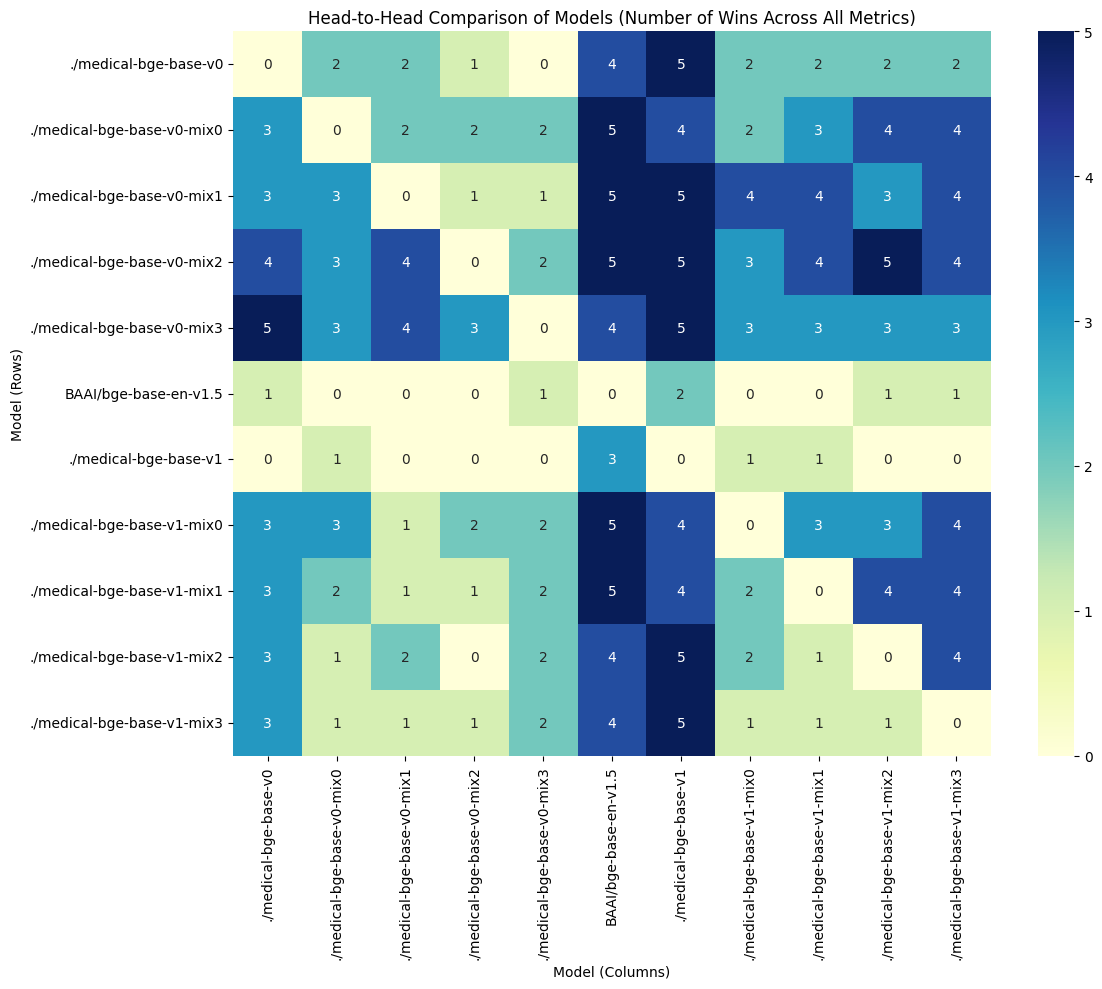

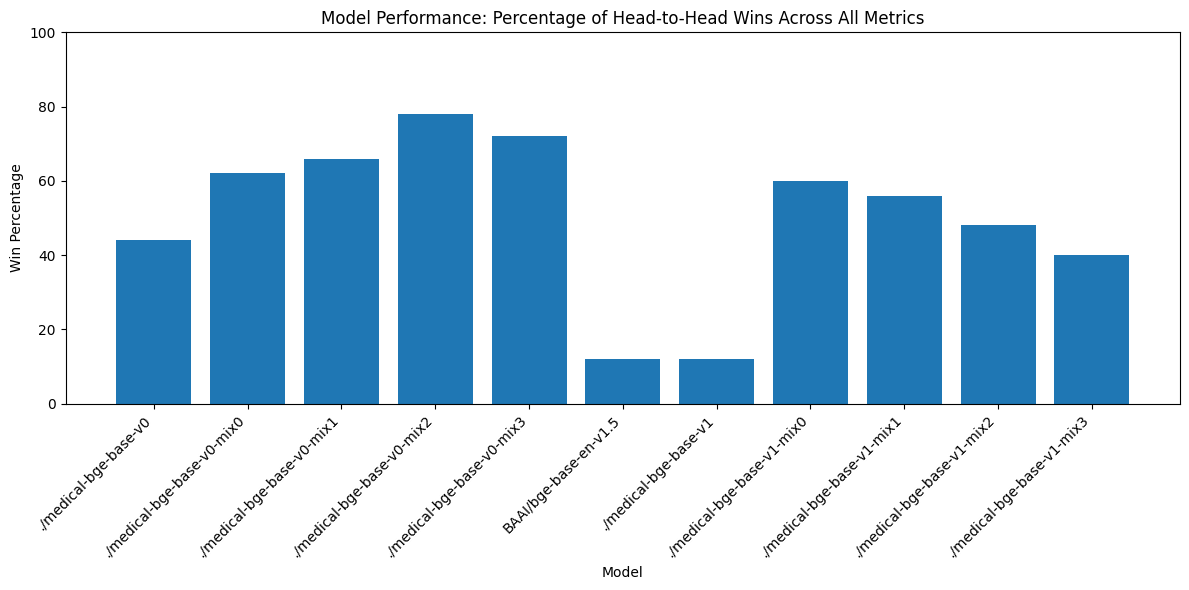

In [24]:
# Compare all models
win_matrix, win_percentages = compare_models(df, metrics=["avg"])
plot_comparison(win_matrix, win_percentages, df['model'].unique())

In [25]:
# Print ranking
ranking = pd.Series(win_percentages, index=df['model'].unique()).sort_values(ascending=False)
print("Model Ranking based on Head-to-Head Wins:")
# for model, percentage in ranking.items():
#     print(f"{model}: {percentage:.2f}%")
ranking = ranking.to_frame(name="win_percent")

ranking.style.background_gradient(cmap='YlGnBu', axis=0, subset=["win_percent"])

Model Ranking based on Head-to-Head Wins:


,win_percent
./medical-bge-base-v0-mix2,78.000000
./medical-bge-base-v0-mix3,72.000000
./medical-bge-base-v0-mix1,66.000000
./medical-bge-base-v0-mix0,62.000000
./medical-bge-base-v1-mix0,60.000000
./medical-bge-base-v1-mix1,56.000000
./medical-bge-base-v1-mix2,48.000000
./medical-bge-base-v0,44.000000
./medical-bge-base-v1-mix3,40.000000
./medical-bge-base-v1,12.000000


## BGE Large

In [26]:
df = pd.read_csv("../results/med_emb_large_v0_results.csv")
df["model"].value_counts()

model
BAAI/bge-large-en-v1.5           5
abhinand/medical-bge-large-v0    5
medical-bge-large-mix0           5
medical-bge-large-mix1           5
medical-bge-large-mix2           5
medical-bge-large-mix3           5
Name: count, dtype: int64

In [27]:
df["task_name"].value_counts()

task_name
PublicHealthQA        6
MedicalQARetrieval    6
TRECCOVID             6
NFCorpus              6
ArguAna               6
Name: count, dtype: int64

In [28]:
selected_metrics = METRICS.copy()

df["avg"] = df[selected_metrics].iloc[:, 2:].mean(axis=1)

selected_metrics.append("avg")

In [29]:
_m1_df = df.loc[df["task_name"] == "ArguAna", selected_metrics]
display(style_dataframe(_m1_df, colormap=create_custom_colormap()))

,task_name,model,ndcg_at_1,ndcg_at_5,ndcg_at_10,map_at_5,map_at_10,recall_at_1,recall_at_5,recall_at_10,precision_at_1,precision_at_5,mrr_at_1,mrr_at_5,avg
4,ArguAna,BAAI/bge-large-en-v1.5,0.401850,0.598830,0.635660,0.541430,0.556640,0.401850,0.770980,0.884780,0.401850,0.154200,0.409673,0.544381,0.525177
9,ArguAna,abhinand/medical-bge-large-v0,0.398290,0.607030,0.638070,0.545820,0.558620,0.398290,0.790900,0.886910,0.398290,0.158180,0.406117,0.548767,0.527940
14,ArguAna,medical-bge-large-mix0,0.413230,0.610180,0.644650,0.552630,0.566980,0.413230,0.783070,0.889050,0.413230,0.156610,0.421053,0.555797,0.534976
19,ArguAna,medical-bge-large-mix1,0.413230,0.612140,0.645350,0.553830,0.567590,0.413230,0.787340,0.889760,0.413230,0.157470,0.420341,0.556401,0.535826
24,ArguAna,medical-bge-large-mix2,0.410380,0.611150,0.644060,0.552480,0.566200,0.410380,0.787340,0.888340,0.410380,0.157470,0.417496,0.555394,0.534256
29,ArguAna,medical-bge-large-mix3,0.404690,0.609910,0.642030,0.550090,0.563440,0.404690,0.789470,0.888340,0.404690,0.157890,0.411807,0.552667,0.531643


In [30]:
_m1_df = df.loc[df["task_name"] == "MedicalQARetrieval", selected_metrics]
display(style_dataframe(_m1_df, colormap=create_custom_colormap()))

,task_name,model,ndcg_at_1,ndcg_at_5,ndcg_at_10,map_at_5,map_at_10,recall_at_1,recall_at_5,recall_at_10,precision_at_1,precision_at_5,mrr_at_1,mrr_at_5,avg
1,MedicalQARetrieval,BAAI/bge-large-en-v1.5,0.541020,0.681400,0.701460,0.642720,0.651090,0.541020,0.796390,0.857910,0.541020,0.159280,0.540527,0.642472,0.608026
6,MedicalQARetrieval,abhinand/medical-bge-large-v0,0.622560,0.728450,0.746560,0.697980,0.705520,0.622560,0.819820,0.875490,0.622560,0.163960,0.622070,0.697738,0.660439
11,MedicalQARetrieval,medical-bge-large-mix0,0.603520,0.719600,0.740890,0.687420,0.696370,0.603520,0.815430,0.880370,0.603520,0.163090,0.603516,0.687419,0.650389
16,MedicalQARetrieval,medical-bge-large-mix1,0.613280,0.725100,0.746140,0.693980,0.702860,0.613280,0.817870,0.881840,0.613280,0.163570,0.612793,0.693734,0.656477
21,MedicalQARetrieval,medical-bge-large-mix2,0.618160,0.729680,0.748240,0.698350,0.706160,0.618160,0.823240,0.879880,0.618160,0.164650,0.617676,0.698104,0.660038
26,MedicalQARetrieval,medical-bge-large-mix3,0.619630,0.730270,0.748450,0.698740,0.706260,0.619630,0.824710,0.880860,0.619630,0.164940,0.619629,0.698739,0.660957


In [31]:
_m1_df = df.loc[df["task_name"] == "NFCorpus", selected_metrics]
display(style_dataframe(_m1_df, colormap=create_custom_colormap()))

,task_name,model,ndcg_at_1,ndcg_at_5,ndcg_at_10,map_at_5,map_at_10,recall_at_1,recall_at_5,recall_at_10,precision_at_1,precision_at_5,mrr_at_1,mrr_at_5,avg
3,NFCorpus,BAAI/bge-large-en-v1.5,0.455110,0.399490,0.368770,0.122000,0.143650,0.065060,0.145560,0.189690,0.470590,0.343650,0.470588,0.554902,0.310755
8,NFCorpus,abhinand/medical-bge-large-v0,0.467490,0.398320,0.368110,0.123490,0.143830,0.068720,0.141410,0.182200,0.479880,0.339940,0.479876,0.559959,0.312769
13,NFCorpus,medical-bge-large-mix0,0.486070,0.403030,0.372370,0.126790,0.148360,0.073370,0.141700,0.185040,0.501550,0.339320,0.501548,0.575335,0.321207
18,NFCorpus,medical-bge-large-mix1,0.482970,0.404290,0.371440,0.127720,0.148570,0.073320,0.141980,0.182520,0.498450,0.341180,0.498452,0.575026,0.320493
23,NFCorpus,medical-bge-large-mix2,0.473680,0.402620,0.370700,0.127560,0.148290,0.072980,0.141840,0.182250,0.489160,0.339940,0.489164,0.570537,0.317393
28,NFCorpus,medical-bge-large-mix3,0.478330,0.401360,0.369390,0.124960,0.145380,0.069870,0.141090,0.181210,0.489160,0.340560,0.489164,0.568731,0.316600


In [32]:
_m1_df = df.loc[df["task_name"] == "PublicHealthQA", selected_metrics]
display(style_dataframe(_m1_df, colormap=create_custom_colormap()))

,task_name,model,ndcg_at_1,ndcg_at_5,ndcg_at_10,map_at_5,map_at_10,recall_at_1,recall_at_5,recall_at_10,precision_at_1,precision_at_5,mrr_at_1,mrr_at_5,avg
0,PublicHealthQA,BAAI/bge-large-en-v1.5,0.622090,0.761550,0.776110,0.722480,0.728210,0.622090,0.877910,0.924420,0.622090,0.175580,0.622093,0.722481,0.681425
5,PublicHealthQA,abhinand/medical-bge-large-v0,0.668600,0.802970,0.812820,0.764440,0.768760,0.668600,0.918600,0.947670,0.668600,0.183720,0.668605,0.764438,0.719819
10,PublicHealthQA,medical-bge-large-mix0,0.674420,0.804630,0.818610,0.768120,0.774380,0.674420,0.912790,0.953490,0.674420,0.182560,0.674419,0.768120,0.723365
15,PublicHealthQA,medical-bge-large-mix1,0.668600,0.801650,0.817530,0.765890,0.772940,0.668600,0.906980,0.953490,0.668600,0.181400,0.668605,0.765891,0.720015
20,PublicHealthQA,medical-bge-large-mix2,0.686050,0.809890,0.823680,0.775290,0.781360,0.686050,0.912790,0.953490,0.686050,0.182560,0.686047,0.775291,0.729879
25,PublicHealthQA,medical-bge-large-mix3,0.686050,0.810830,0.819110,0.774810,0.778680,0.686050,0.918600,0.941860,0.686050,0.183720,0.686047,0.774806,0.728884


In [33]:
_m1_df = df.loc[df["task_name"] == "TRECCOVID", selected_metrics]
display(style_dataframe(_m1_df, colormap=create_custom_colormap()))

,task_name,model,ndcg_at_1,ndcg_at_5,ndcg_at_10,map_at_5,map_at_10,recall_at_1,recall_at_5,recall_at_10,precision_at_1,precision_at_5,mrr_at_1,mrr_at_5,avg
2,TRECCOVID,BAAI/bge-large-en-v1.5,0.640000,0.665840,0.644030,0.008770,0.015440,0.001860,0.009860,0.018140,0.680000,0.712000,0.680000,0.802333,0.406523
7,TRECCOVID,abhinand/medical-bge-large-v0,0.730000,0.747790,0.730810,0.010100,0.019110,0.002190,0.010900,0.021290,0.840000,0.800000,0.840000,0.903333,0.471294
12,TRECCOVID,medical-bge-large-mix0,0.750000,0.760140,0.740650,0.010380,0.019450,0.002150,0.011050,0.021450,0.800000,0.812000,0.800000,0.885000,0.467689
17,TRECCOVID,medical-bge-large-mix1,0.780000,0.769290,0.751010,0.010530,0.019760,0.002220,0.011240,0.021730,0.840000,0.828000,0.840000,0.906667,0.481704
22,TRECCOVID,medical-bge-large-mix2,0.770000,0.763000,0.757290,0.010440,0.019860,0.002220,0.011170,0.021890,0.840000,0.820000,0.840000,0.910667,0.480545
27,TRECCOVID,medical-bge-large-mix3,0.730000,0.751680,0.755150,0.010250,0.019750,0.002140,0.011100,0.021900,0.800000,0.816000,0.800000,0.887333,0.467109


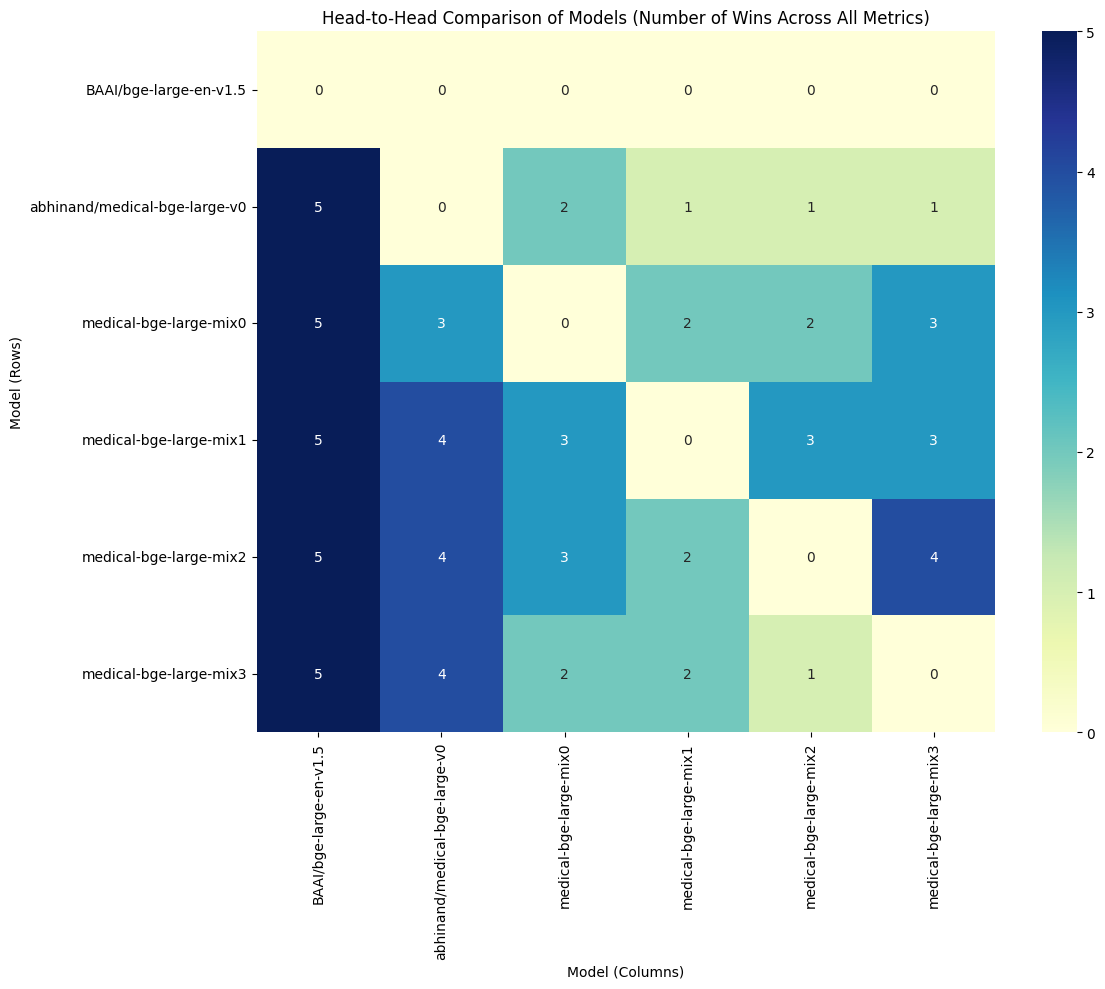

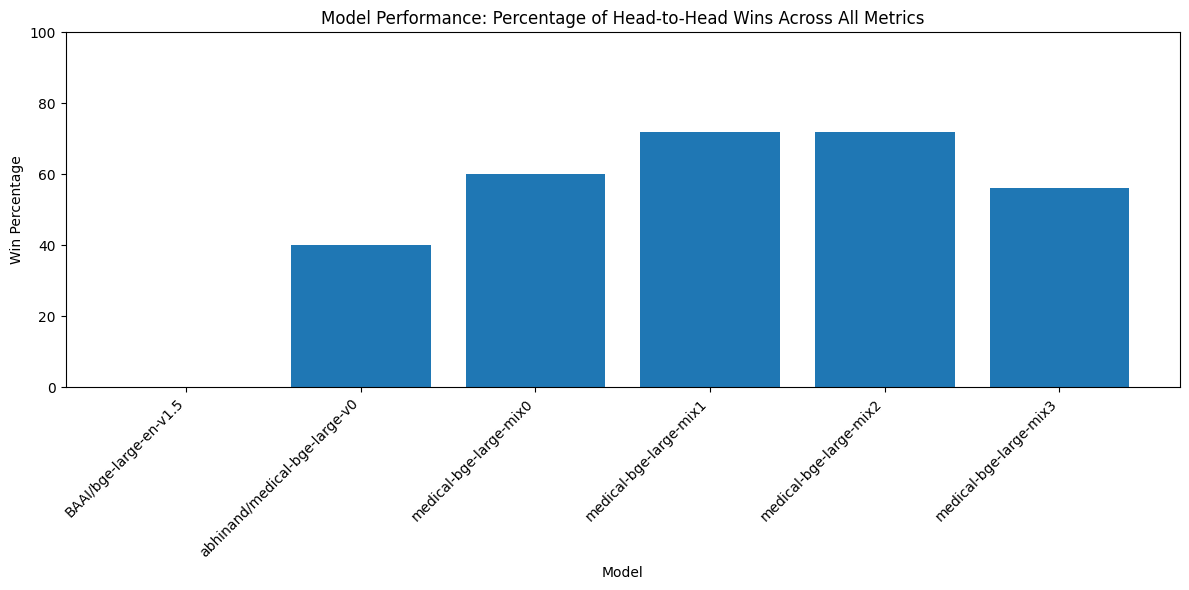

In [34]:
# Compare all models
win_matrix, win_percentages = compare_models(df, metrics=["avg"])
plot_comparison(win_matrix, win_percentages, df['model'].unique())

In [35]:
# Print ranking
ranking = pd.Series(win_percentages, index=df['model'].unique()).sort_values(ascending=False)
print("Model Ranking based on Head-to-Head Wins:")
# for model, percentage in ranking.items():
#     print(f"{model}: {percentage:.2f}%")
ranking = ranking.to_frame(name="win_percent")

ranking.style.background_gradient(cmap='YlGnBu', axis=0, subset=["win_percent"])

Model Ranking based on Head-to-Head Wins:


,win_percent
medical-bge-large-mix2,72.000000
medical-bge-large-mix1,72.000000
medical-bge-large-mix0,60.000000
medical-bge-large-mix3,56.000000
abhinand/medical-bge-large-v0,40.000000
BAAI/bge-large-en-v1.5,0.000000


## Performance to Size Comparison

In [36]:
selected_models = [
    "BAAI/bge-small-en-v1.5",
    "./medical-bge-small-v1-mix1",
    "BAAI/bge-base-en-v1.5",
    "./medical-bge-base-v0-mix2",
    "BAAI/bge-large-en-v1.5",
    "medical-bge-large-mix2",
]

df = pd.concat([
    pd.read_csv("../results/med_emb_small_v1_results.csv"),
    pd.read_csv("../results/med_emb_base_v0_results.csv"),
    pd.read_csv("../results/med_emb_large_v0_results.csv")
], ignore_index=True)

df = df[df["model"].isin(selected_models)].reset_index(drop=True)

In [37]:
df["task_name"].value_counts()

task_name
PublicHealthQA        6
MedicalQARetrieval    6
TRECCOVID             6
NFCorpus              6
ArguAna               6
Name: count, dtype: int64

In [38]:
selected_metrics = METRICS.copy()

df["avg"] = df[selected_metrics].iloc[:, 2:].mean(axis=1)

selected_metrics.append("avg")

In [39]:
_m1_df = df.loc[df["task_name"] == "ArguAna", selected_metrics]
display(style_dataframe(_m1_df, colormap=create_custom_colormap()))

,task_name,model,ndcg_at_1,ndcg_at_5,ndcg_at_10,map_at_5,map_at_10,recall_at_1,recall_at_5,recall_at_10,precision_at_1,precision_at_5,mrr_at_1,mrr_at_5,avg
4,ArguAna,./medical-bge-small-v1-mix1,0.379090,0.576050,0.615700,0.517240,0.533780,0.379090,0.753200,0.874820,0.379090,0.150640,0.382646,0.518611,0.504996
9,ArguAna,BAAI/bge-small-en-v1.5,0.357750,0.551760,0.594990,0.495130,0.513220,0.357750,0.721910,0.854200,0.357750,0.144380,0.362731,0.496230,0.483983
14,ArguAna,./medical-bge-base-v0-mix2,0.403980,0.597960,0.639010,0.541070,0.558360,0.403980,0.768850,0.894030,0.403980,0.153770,0.408250,0.543433,0.526389
19,ArguAna,BAAI/bge-base-en-v1.5,0.407540,0.594610,0.636160,0.540230,0.557730,0.407540,0.757470,0.884070,0.407540,0.151490,0.413940,0.542911,0.525103
24,ArguAna,BAAI/bge-large-en-v1.5,0.401850,0.598830,0.635660,0.541430,0.556640,0.401850,0.770980,0.884780,0.401850,0.154200,0.409673,0.544381,0.525177
29,ArguAna,medical-bge-large-mix2,0.410380,0.611150,0.644060,0.552480,0.566200,0.410380,0.787340,0.888340,0.410380,0.157470,0.417496,0.555394,0.534256


In [40]:
_m1_df = df.loc[df["task_name"] == "NFCorpus", selected_metrics]
display(style_dataframe(_m1_df, colormap=create_custom_colormap()))

,task_name,model,ndcg_at_1,ndcg_at_5,ndcg_at_10,map_at_5,map_at_10,recall_at_1,recall_at_5,recall_at_10,precision_at_1,precision_at_5,mrr_at_1,mrr_at_5,avg
3,NFCorpus,./medical-bge-small-v1-mix1,0.431890,0.377080,0.347770,0.111360,0.130180,0.060250,0.129190,0.167450,0.445820,0.326930,0.445820,0.531734,0.292123
8,NFCorpus,BAAI/bge-small-en-v1.5,0.417960,0.372420,0.337080,0.106860,0.123560,0.057490,0.127950,0.158220,0.430340,0.323840,0.430341,0.521930,0.283999
13,NFCorpus,./medical-bge-base-v0-mix2,0.487620,0.401300,0.371620,0.123260,0.144070,0.070040,0.137370,0.176980,0.510840,0.342410,0.510836,0.579051,0.321283
18,NFCorpus,BAAI/bge-base-en-v1.5,0.450460,0.404780,0.368100,0.122300,0.141830,0.063520,0.141090,0.175600,0.470590,0.352940,0.473684,0.561610,0.310542
23,NFCorpus,BAAI/bge-large-en-v1.5,0.455110,0.399490,0.368770,0.122000,0.143650,0.065060,0.145560,0.189690,0.470590,0.343650,0.470588,0.554902,0.310755
28,NFCorpus,medical-bge-large-mix2,0.473680,0.402620,0.370700,0.127560,0.148290,0.072980,0.141840,0.182250,0.489160,0.339940,0.489164,0.570537,0.317393


In [41]:
_m1_df = df.loc[df["task_name"] == "MedicalQARetrieval", selected_metrics]
display(style_dataframe(_m1_df, colormap=create_custom_colormap()))

,task_name,model,ndcg_at_1,ndcg_at_5,ndcg_at_10,map_at_5,map_at_10,recall_at_1,recall_at_5,recall_at_10,precision_at_1,precision_at_5,mrr_at_1,mrr_at_5,avg
1,MedicalQARetrieval,./medical-bge-small-v1-mix1,0.557620,0.683590,0.703160,0.648100,0.656170,0.557620,0.789550,0.850100,0.557620,0.157910,0.557617,0.648104,0.613930
6,MedicalQARetrieval,BAAI/bge-small-en-v1.5,0.481450,0.634300,0.655580,0.591960,0.600810,0.481450,0.760250,0.825680,0.481450,0.152050,0.481445,0.591960,0.561532
11,MedicalQARetrieval,./medical-bge-base-v0-mix2,0.595700,0.716450,0.734800,0.682450,0.690140,0.595700,0.817870,0.874020,0.595700,0.163570,0.595703,0.682454,0.645380
16,MedicalQARetrieval,BAAI/bge-base-en-v1.5,0.539060,0.675570,0.696930,0.637330,0.646270,0.539060,0.789550,0.854980,0.539060,0.157910,0.539062,0.637329,0.604343
21,MedicalQARetrieval,BAAI/bge-large-en-v1.5,0.541020,0.681400,0.701460,0.642720,0.651090,0.541020,0.796390,0.857910,0.541020,0.159280,0.540527,0.642472,0.608026
26,MedicalQARetrieval,medical-bge-large-mix2,0.618160,0.729680,0.748240,0.698350,0.706160,0.618160,0.823240,0.879880,0.618160,0.164650,0.617676,0.698104,0.660038


In [42]:
_m1_df = df.loc[df["task_name"] == "PublicHealthQA", selected_metrics]
display(style_dataframe(_m1_df, colormap=create_custom_colormap()))

,task_name,model,ndcg_at_1,ndcg_at_5,ndcg_at_10,map_at_5,map_at_10,recall_at_1,recall_at_5,recall_at_10,precision_at_1,precision_at_5,mrr_at_1,mrr_at_5,avg
0,PublicHealthQA,./medical-bge-small-v1-mix1,0.674420,0.800700,0.817970,0.766760,0.774090,0.674420,0.901160,0.953490,0.674420,0.180230,0.674419,0.766764,0.721570
5,PublicHealthQA,BAAI/bge-small-en-v1.5,0.598840,0.750500,0.761770,0.706010,0.710670,0.598840,0.883720,0.918600,0.598840,0.176740,0.598837,0.706008,0.667448
10,PublicHealthQA,./medical-bge-base-v0-mix2,0.709300,0.810220,0.825670,0.781780,0.788410,0.709300,0.895350,0.941860,0.709300,0.179070,0.709302,0.781783,0.736779
15,PublicHealthQA,BAAI/bge-base-en-v1.5,0.645350,0.782880,0.786750,0.743410,0.745070,0.645350,0.901160,0.912790,0.645350,0.180230,0.645349,0.743411,0.698092
20,PublicHealthQA,BAAI/bge-large-en-v1.5,0.622090,0.761550,0.776110,0.722480,0.728210,0.622090,0.877910,0.924420,0.622090,0.175580,0.622093,0.722481,0.681425
25,PublicHealthQA,medical-bge-large-mix2,0.686050,0.809890,0.823680,0.775290,0.781360,0.686050,0.912790,0.953490,0.686050,0.182560,0.686047,0.775291,0.729879


In [43]:
_m1_df = df.loc[df["task_name"] == "TRECCOVID", selected_metrics]
display(style_dataframe(_m1_df, colormap=create_custom_colormap()))

,task_name,model,ndcg_at_1,ndcg_at_5,ndcg_at_10,map_at_5,map_at_10,recall_at_1,recall_at_5,recall_at_10,precision_at_1,precision_at_5,mrr_at_1,mrr_at_5,avg
2,TRECCOVID,./medical-bge-small-v1-mix1,0.840000,0.782420,0.778130,0.010410,0.019480,0.002390,0.011080,0.021510,0.900000,0.824000,0.900000,0.936667,0.502174
7,TRECCOVID,BAAI/bge-small-en-v1.5,0.720000,0.692680,0.664590,0.008790,0.015910,0.002100,0.009620,0.018390,0.820000,0.740000,0.820000,0.872333,0.448701
12,TRECCOVID,./medical-bge-base-v0-mix2,0.710000,0.734520,0.728370,0.009720,0.018670,0.002130,0.010630,0.021100,0.780000,0.792000,0.780000,0.880000,0.455595
17,TRECCOVID,BAAI/bge-base-en-v1.5,0.650000,0.674010,0.671830,0.009080,0.016820,0.001900,0.010100,0.019590,0.700000,0.728000,0.700000,0.809000,0.415861
22,TRECCOVID,BAAI/bge-large-en-v1.5,0.640000,0.665840,0.644030,0.008770,0.015440,0.001860,0.009860,0.018140,0.680000,0.712000,0.680000,0.802333,0.406523
27,TRECCOVID,medical-bge-large-mix2,0.770000,0.763000,0.757290,0.010440,0.019860,0.002220,0.011170,0.021890,0.840000,0.820000,0.840000,0.910667,0.480545


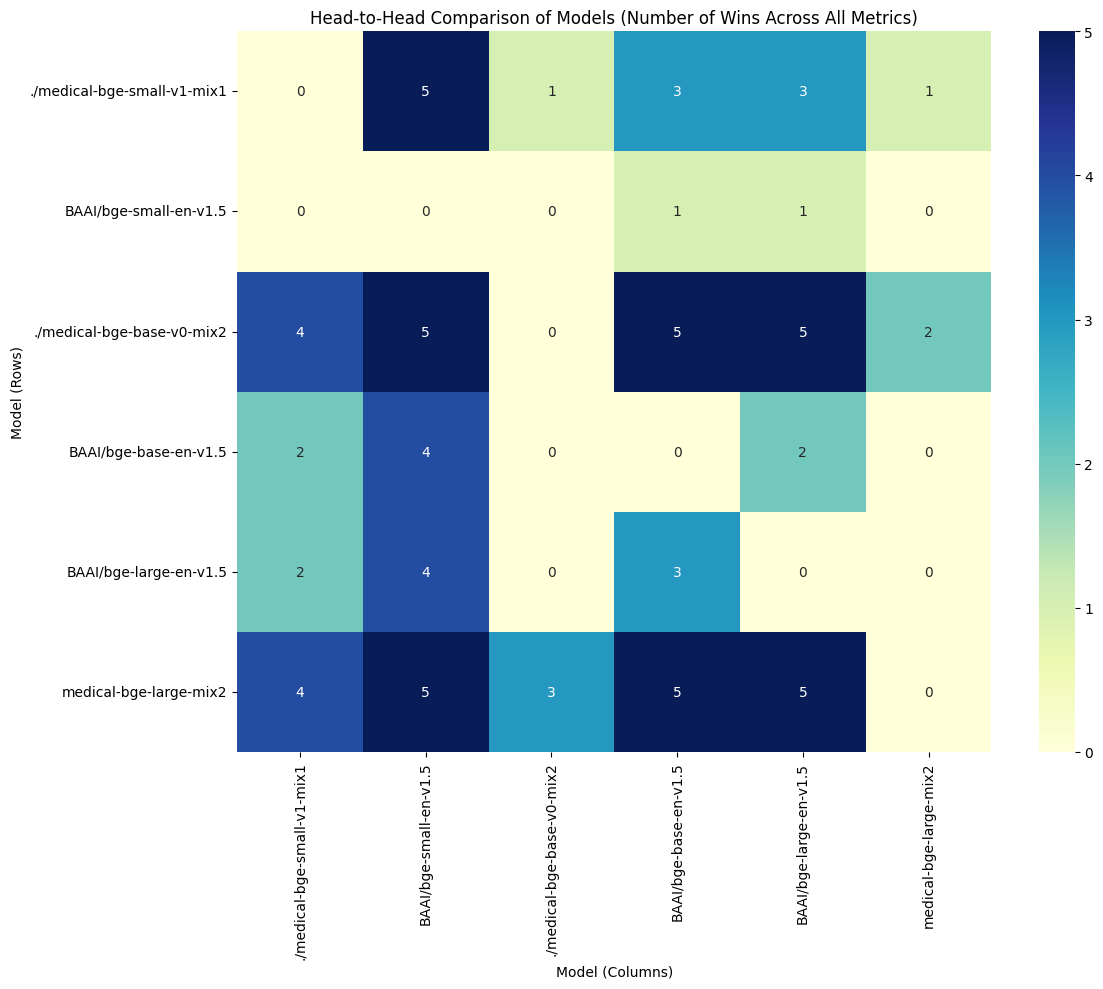

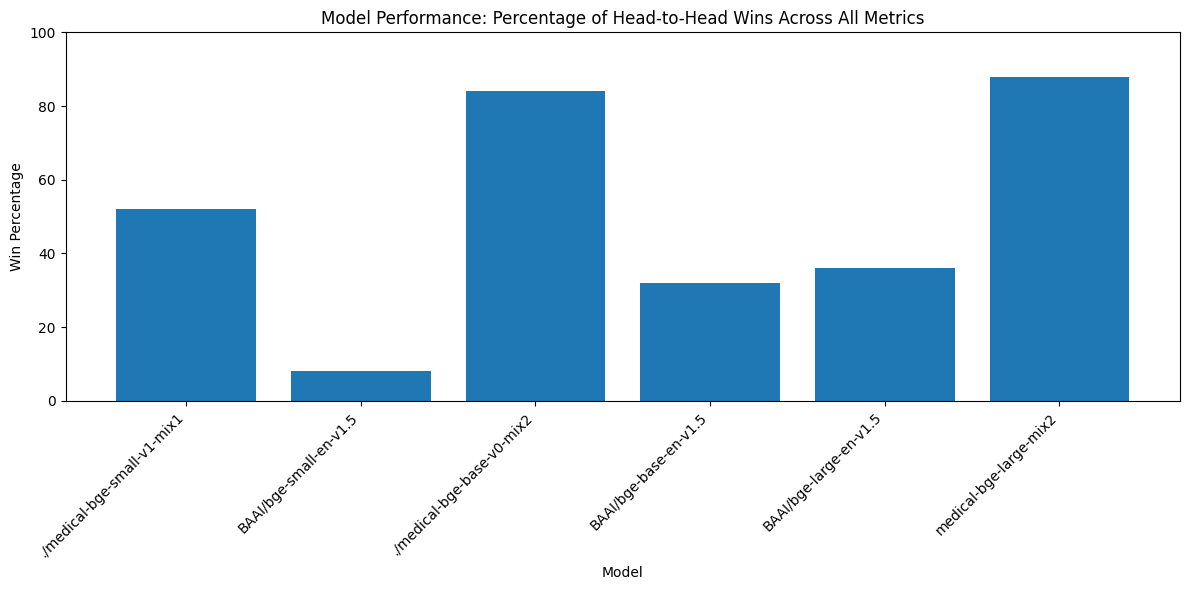

In [44]:
# Compare all models
win_matrix, win_percentages = compare_models(df, metrics=["avg"])
plot_comparison(win_matrix, win_percentages, df['model'].unique())

In [45]:
print(selected_metrics[2:])

['ndcg_at_1', 'ndcg_at_5', 'ndcg_at_10', 'map_at_5', 'map_at_10', 'recall_at_1', 'recall_at_5', 'recall_at_10', 'precision_at_1', 'precision_at_5', 'mrr_at_1', 'mrr_at_5', 'avg']


In [46]:
# Print ranking
ranking = pd.Series(win_percentages, index=df['model'].unique()).sort_values(ascending=False)
print("""Model Ranking based on Head-to-Head Wins on 5 Benchmarks:
- ArguAna
- MedicalQARetrieval
- NFCorpus
- PublicHealthQA
- TRECCOVID

Metrics -> nDCG @ 1, nDCG @ 5, nDCG @ 10, 
           MAP @ 5, MAP @ 10, Recall @ 1, 
           Recall @ 5, Recall @ 10, Precision @ 1, 
           Precision @ 5, MRR @ 1, MRR @ 5, Average
""")
# for model, percentage in ranking.items():
#     print(f"{model}: {percentage:.2f}%")
ranking = ranking.to_frame(name="win_percent")

ranking.style.background_gradient(cmap='YlGnBu', axis=0, subset=["win_percent"])

Model Ranking based on Head-to-Head Wins on 5 Benchmarks:
- ArguAna
- MedicalQARetrieval
- NFCorpus
- PublicHealthQA
- TRECCOVID

Metrics -> nDCG @ 1, nDCG @ 5, nDCG @ 10, 
           MAP @ 5, MAP @ 10, Recall @ 1, 
           Recall @ 5, Recall @ 10, Precision @ 1, 
           Precision @ 5, MRR @ 1, MRR @ 5, Average



,win_percent
medical-bge-large-mix2,88.000000
./medical-bge-base-v0-mix2,84.000000
./medical-bge-small-v1-mix1,52.000000
BAAI/bge-large-en-v1.5,36.000000
BAAI/bge-base-en-v1.5,32.000000
BAAI/bge-small-en-v1.5,8.000000
